# AUDIO CLASSIFICATION

In [4]:
!pip install librosa

In [5]:
import matplotlib.pyplot as plt #to display signals

In [6]:
%matplotlib inline

In [7]:
filename='UrbanSound8K/dog_barking.wav'

In [8]:
import IPython.display as ipd#display graphs
import librosa
import librosa.display

In [9]:
cd C:\Users\DELL\Downloads

C:\Users\DELL\Downloads


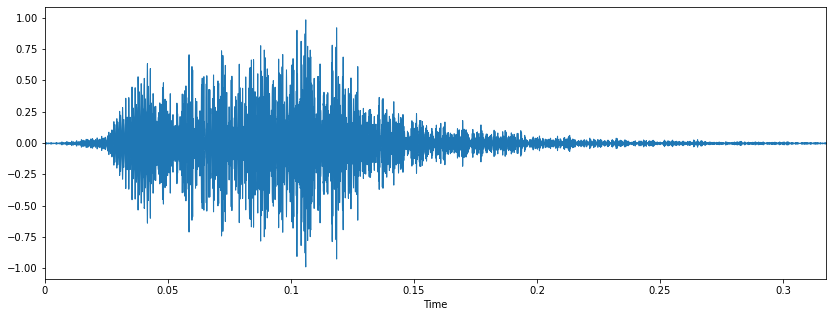

In [10]:
#DOG SOUND
plt.figure(figsize=(14,5))#plot the figure
data,sample_rate=librosa.load(filename)
librosa.display.waveplot(data,sr=sample_rate)
ipd.Audio(filename)

In [11]:
cd C:\Users\DELL\Downloads

C:\Users\DELL\Downloads


In [12]:
sample_rate# with the help of librosa we read the signals atr a rate of 22050

22050

in  an auido we may have diff sample rates for diff channels lik emono and stereo
but in librosa it will try to normalize entire data at singel sample rate

In a audio there may be diff sample rates at some time it may be diff channels also.. it will try to normalize the data and give the audio in single sample rate

In [13]:
#using scipy
from scipy.io import wavfile as wav
wave_sample_rate,wave_audio=wav.read(filename)

In [14]:
wave_sample_rate

44100

In [15]:
wave_audio

array([[-150, -148],
       [-160, -157],
       [-151, -151],
       ...,
       [ -19,  -24],
       [ -14,  -18],
       [   1,   -1]], dtype=int16)

In [16]:
data #all the values are getting normalized between -1 ND 1

array([-0.00346022, -0.00502555, -0.00465325, ..., -0.00248061,
       -0.00155105, -0.0003528 ], dtype=float32)

so from scipy and librosa both of libraries we can actually perform the audio EDA but librosa is 
giving all normalized values wheras scipy is giving actual values



w.r.t librosa ..it is commonly used for auido signal processing .
1.it tries to converge the signal to single sample rate
2. It will try to normalize the values b/1 -1 to 1

In [17]:
import pandas as pd
audio_dataset_path='C:/Users/DELL/Downloads/UrbanSound8K/UrbanSound8K/audio'
metadata=pd.read_csv(r'C:\Users\DELL\Downloads\UrbanSound8K\UrbanSound8K\metadata\UrbanSound8K.csv')
metadata.head(5)

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [18]:
#check whether dataset is imbalanced
metadata['class'].value_counts()

street_music        1000
jackhammer          1000
dog_bark            1000
drilling            1000
children_playing    1000
engine_idling       1000
air_conditioner     1000
siren                929
car_horn             429
gun_shot             374
Name: class, dtype: int64

# DATA PREPROCESSING

Extract the independent and dependent features.Independent features are the extracted features from audio signals.and the dependent features are like class and label names.

when we have stero channel, we ahve 2 values when we sue scipy..
we create some independent features by taking the signals using MFCC which usually represents that audio

Here we will be using Mel-Frequency Cepstral Coefficients(MFCC) from the audio samples.
MFCC summarises freq dist across the window size, so it is possible to analyse both the frq and time characteristics of sound, These audio representataions allow us to identify features for classificationn


In [19]:
import librosa
mfccs=librosa.feature.mfcc(y=data,sr=sample_rate,n_mfcc=40)
print(mfccs.shape)  #all audio signals are converted to an array of dimensions 40 and 36

(40, 14)


In [20]:
# It is an array (mfccs) is patterns extracted based on time and freq values of those audio files
#based on this they will get classified
#Feature extraction: These patterns will be used later in deep learning
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast')
    mfccs_features=librosa.feature.mfcc(y=audio, sr=sample_rate,n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    return mfccs_scaled_features
#this is features extracted for only one audio file and in order to extract for all other files with the help of iteros function which iterates through all other files

In [21]:
import os
import numpy as np
from tqdm import tqdm
#now we iterate through every audio file and extract features
#using Mel-Frequency cepstral coefficients
extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    file_name=os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row['fold'])+'/',str(row['slice_file_name']))
    final_class_labels=row['class']
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])

3555it [08:20,  8.06it/s]C:\Users\DELL\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1323
  warnings.warn(
8326it [20:23,  9.57it/s]C:\Users\DELL\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1103
  warnings.warn(
8329it [20:23, 11.53it/s]C:\Users\DELL\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1523
  warnings.warn(
8732it [21:15,  6.85it/s]


In [22]:
#converting extracted features to pandas dataframes
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[-215.79301, 71.66612, -131.81377, -52.091328,...",dog_bark
1,"[-424.68677, 110.56227, -54.14824, 62.01073, -...",children_playing
2,"[-459.56467, 122.800354, -47.92471, 53.265694,...",children_playing
3,"[-414.55377, 102.896904, -36.66495, 54.18041, ...",children_playing
4,"[-447.397, 115.0954, -53.809113, 61.608585, 1....",children_playing


In [73]:
#split the dataset into independent and dependent dataset
x=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [74]:
x.shape

(8732, 40)

In [75]:
y.shape

(8732,)

In [76]:
#label encoding to class feature 
#y=np.array(pd.get_dummies(y))
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [26]:
#Train Test Split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [27]:
x_train.shape

(6985, 40)

In [28]:
x_test.shape

(1747, 40)

In [29]:
y_train.shape

(6985, 10)

In [30]:
y_test.shape

(1747, 10)

# MODEL CREATION

In [31]:
!pip install tensorflow

In [32]:
#we are using tensorflow 2.2.0 for model creation
import tensorflow as tf
print(tf.__version__)

2.4.1


In [33]:
from tensorflow.keras.models import Sequential #to create ANN model and see the accuracy
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten#to see accuracy through ANN model
from tensorflow.keras.optimizers import Adam #we are using Adam optimizer
from sklearn import metrics 

In [34]:
num_labels=y.shape[1] #number of classes

In [46]:
#creating ANN with 3 dense layers
model=Sequential()
#first layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
#Second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
#third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))
#final year
model.add(Dense(num_labels))#number of classes
model.add(Activation('softmax')) #it will have softmax as it is multi class classification

In [47]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               4100      
_________________________________________________________________
activation (Activation)      (None, 100)               0         
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 200)               20200     
_________________________________________________________________
activation_1 (Activation)    (None, 200)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               2

In [48]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [60]:
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(x_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(x_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/100
219/219 [==============================] - 5s 8ms/step - loss: 21.2857 - accuracy: 0.1200 - val_loss: 2.2593 - val_accuracy: 0.1586

Epoch 00001: val_loss improved from inf to 2.25929, saving model to saved_models\audio_classification.hdf5
Epoch 2/100
219/219 [==============================] - 1s 5ms/step - loss: 2.8392 - accuracy: 0.1297 - val_loss: 2.2562 - val_accuracy: 0.1534

Epoch 00002: val_loss improved from 2.25929 to 2.25618, saving model to saved_models\audio_classification.hdf5
Epoch 3/100
219/219 [==============================] - 1s 4ms/step - loss: 2.3574 - accuracy: 0.1641 - val_loss: 2.1729 - val_accuracy: 0.2261

Epoch 00003: val_loss improved from 2.25618 to 2.17288, saving model to saved_models\audio_classification.hdf5
Epoch 4/100
219/219 [==============================] - 1s 5ms/step - loss: 2.2217 - accuracy: 0.1947 - val_loss: 2.0829 - val_accuracy: 0.2805

Epoch 00004: val_loss improved from 2.17288 to 2.08289, saving model to saved_models\audio_cla

219/219 [==============================] - 1s 4ms/step - loss: 1.1826 - accuracy: 0.5832 - val_loss: 0.9940 - val_accuracy: 0.6737

Epoch 00035: val_loss improved from 1.03679 to 0.99395, saving model to saved_models\audio_classification.hdf5
Epoch 36/100
219/219 [==============================] - 1s 6ms/step - loss: 1.1955 - accuracy: 0.5987 - val_loss: 0.9923 - val_accuracy: 0.6732

Epoch 00036: val_loss improved from 0.99395 to 0.99233, saving model to saved_models\audio_classification.hdf5
Epoch 37/100
219/219 [==============================] - 2s 8ms/step - loss: 1.1832 - accuracy: 0.5918 - val_loss: 0.9799 - val_accuracy: 0.6783

Epoch 00037: val_loss improved from 0.99233 to 0.97991, saving model to saved_models\audio_classification.hdf5
Epoch 38/100
219/219 [==============================] - 1s 5ms/step - loss: 1.1756 - accuracy: 0.5987 - val_loss: 0.9889 - val_accuracy: 0.6766

Epoch 00038: val_loss did not improve from 0.97991
Epoch 39/100
219/219 [===========================

219/219 [==============================] - 1s 5ms/step - loss: 0.9985 - accuracy: 0.6623 - val_loss: 0.8121 - val_accuracy: 0.7447

Epoch 00072: val_loss did not improve from 0.80685
Epoch 73/100
219/219 [==============================] - 1s 5ms/step - loss: 0.9932 - accuracy: 0.6554 - val_loss: 0.8159 - val_accuracy: 0.7441

Epoch 00073: val_loss did not improve from 0.80685
Epoch 74/100
219/219 [==============================] - 1s 4ms/step - loss: 0.9919 - accuracy: 0.6689 - val_loss: 0.8024 - val_accuracy: 0.7436

Epoch 00074: val_loss improved from 0.80685 to 0.80242, saving model to saved_models\audio_classification.hdf5
Epoch 75/100
219/219 [==============================] - 1s 5ms/step - loss: 0.9839 - accuracy: 0.6731 - val_loss: 0.7861 - val_accuracy: 0.7550

Epoch 00075: val_loss improved from 0.80242 to 0.78609, saving model to saved_models\audio_classification.hdf5
Epoch 76/100
219/219 [==============================] - 1s 5ms/step - loss: 0.9990 - accuracy: 0.6660 - val_l

In [62]:
test_accuracy=model.evaluate(x_test,y_test,verbose=0)
print(test_accuracy[1])

0.7424155473709106


In [63]:
filename="UrbanSound8K/dog_bark.wav"
prediction_feature=features_extractor(filename)
prediction_feature=prediction_feature.reshape(1,-1)
model.predict_classes(prediction_feature)

C:\Users\DELL\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([9], dtype=int64)

# Testing some new Audio data

steps:
    1)Preprocess the new audio data
    2)predict the classes
    3)Inverse transform your predicted label

extract features from that specific data itself with the help of mfcc and predict the class labels with the model created.
Model will predict the classes and it will actually give lables.. nad we will inverse transform the label to get the class name

there are 2 changes we make now

when we really want to work with the test data, we also need to inverse transform that label to class name... we we use label encoder

so we convert them to class labels like 0,1,2,3,... and total class is 10... 

In [77]:
filename="UrbanSound8K/UrbanSound8K/street_music_1.wav"
audio, sample_rate = librosa.load(filename, res_type='kaiser_fast') 
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

print(mfccs_scaled_features)
mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)#1 audio file selected so (1,-1)as 1row with 40 features of values 
print(mfccs_scaled_features)
print(mfccs_scaled_features.shape)
predicted_label=model.predict_classes(mfccs_scaled_features)
print(predicted_label)
prediction_class = labelencoder.inverse_transform(predicted_label) 
prediction_class

[-1.4762386e+02  1.2148871e+02 -1.9746994e+00  4.6449009e+01
  1.1048691e+01  3.4277672e+01 -9.5827780e+00  1.3403845e+01
 -3.6422760e+00  1.6688198e+01  3.2877028e-01  1.7845268e+01
  2.1345079e-01  1.4688194e+01  1.0342908e+00  1.2780090e+01
  2.0872319e+00  9.2049847e+00 -2.2742996e-01  4.9591260e+00
 -5.5770475e-01  3.7374232e+00  2.1352353e+00  1.4578342e+00
 -3.5060008e+00 -2.5080557e+00  8.4860831e-01  1.4978745e+00
  3.9081331e-02  8.6903816e-01 -2.1107571e+00  7.5720340e-01
  1.4847959e+00 -8.6945248e-01 -3.3441734e+00 -3.6011941e+00
 -2.1879826e+00 -7.0866375e+00 -5.9911575e+00  1.2991518e-01]
[[-1.4762386e+02  1.2148871e+02 -1.9746994e+00  4.6449009e+01
   1.1048691e+01  3.4277672e+01 -9.5827780e+00  1.3403845e+01
  -3.6422760e+00  1.6688198e+01  3.2877028e-01  1.7845268e+01
   2.1345079e-01  1.4688194e+01  1.0342908e+00  1.2780090e+01
   2.0872319e+00  9.2049847e+00 -2.2742996e-01  4.9591260e+00
  -5.5770475e-01  3.7374232e+00  2.1352353e+00  1.4578342e+00
  -3.5060008e+00 

array(['air_conditioner'], dtype='<U16')